In [118]:
#loading in respective imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
sns.set(style="darkgrid")

In [119]:
#reading in parameter settings and creating dict for data viz
pdSingleParamDataset = pd.read_excel("../optimizationModel/dataInputs/inputSheet.xlsx",sheet_name='systemSettings')
pdEyParamDataset = pd.read_excel("../optimizationModel/dataInputs/inputSheet.xlsx",sheet_name='eyUnitSettings')

parameterSettingsDict = {}

for paramName,paramValue in zip(pdSingleParamDataset["ParamName"],pdSingleParamDataset["Value"]):
    parameterSettingsDict[paramName] = paramValue

In [120]:
#reading in output from optimization model and setting up structure for data viz
singleValueData = pd.read_excel("../optimizationModel/modelOutputs/testRun.xlsx",sheet_name="singleValueDvs")

hourlySingleValueData = pd.read_excel("../optimizationModel/modelOutputs/testRun.xlsx",sheet_name="hourlyValueDvs")

hourlyEyValueData = pd.read_excel("../optimizationModel/modelOutputs/testRun.xlsx",sheet_name="hourlyEyValueDvs",usecols="B")


combinedDf = pd.concat([hourlySingleValueData,hourlyEyValueData.rename(columns={0: "eyGen"})], axis=1, join='inner')

#cleaning up combined data and adding new column for data analysis purposes
del combinedDf["Unnamed: 0"]
combinedDf["eyDirectToHb"] = combinedDf["eyGen"] - (combinedDf["hsStore"]/parameterSettingsDict["hsDeployEfficiency"])


#combinedDf.head()

Text(0, 0.5, 'Generation/charge (MWh)')

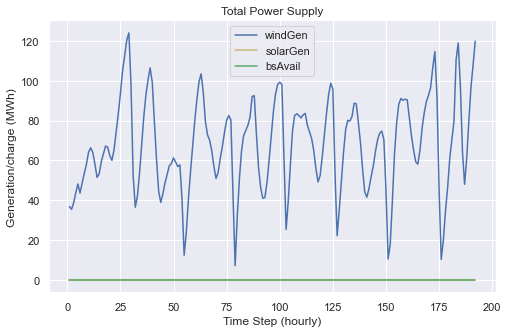

In [121]:
combinedDf.plot(x="timestep", y=["windGen","solarGen","bsAvail"],
                style=['b','y','g'],figsize=(8, 5))
plt.title("Total Power Supply")
plt.xlabel("Time Step (hourly)")
plt.ylabel("Generation/charge (MWh)")

Text(0, 0.5, 'Power (MWh)')

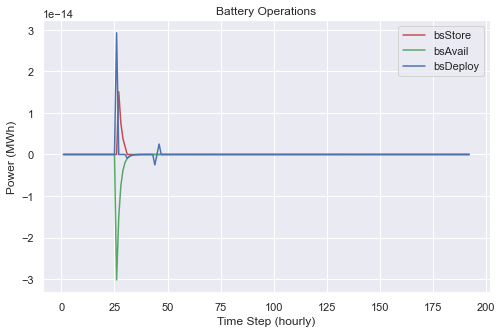

In [122]:
combinedDf.plot(x="timestep", y=["bsStore","bsAvail","bsDeploy"],
                style=['r','g','b'],figsize=(8, 5))
plt.title("Battery Operations")
plt.xlabel("Time Step (hourly)")
plt.ylabel("Power (MWh)")

Text(0, 0.5, 'Hydrogen (kg)')

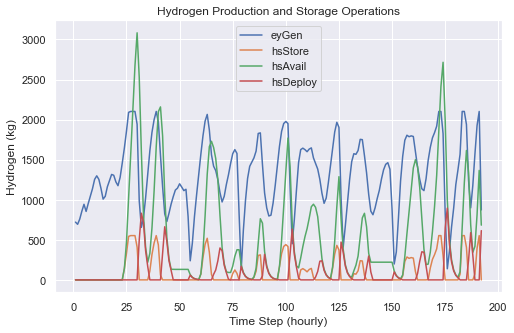

In [123]:
combinedDf.plot(x="timestep", y=["eyGen","hsStore","hsAvail","hsDeploy"],
                figsize=(8, 5))
plt.title("Hydrogen Production and Storage Operations")
plt.xlabel("Time Step (hourly)")
plt.ylabel("Hydrogen (kg)")

Text(0, 0.5, 'Chemical Production(kg)')

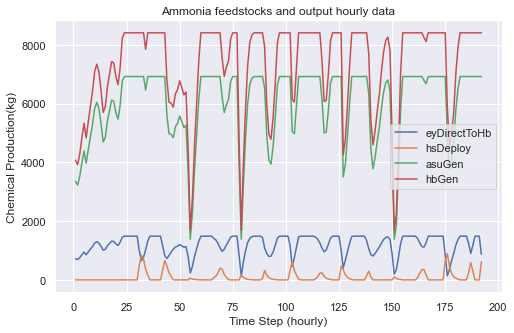

In [124]:
combinedDf.plot(x="timestep", y=["eyDirectToHb","hsDeploy","asuGen","hbGen"],
                figsize=(8, 5))

plt.title("Ammonia feedstocks and output hourly data")
plt.xlabel("Time Step (hourly)")
plt.ylabel("Chemical Production(kg)")

Text(0, 0.5, 'MWh')

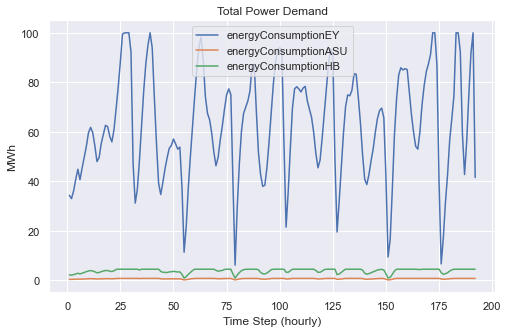

In [125]:
#now looking at energy consumption
#creating new panda columns
combinedDf["energyConsumptionEY"] = combinedDf["eyGen"]*pdEyParamDataset["energyUseEY"][0]
combinedDf["energyConsumptionASU"] = combinedDf["asuGen"]*parameterSettingsDict["energyUseASU"]
combinedDf["energyConsumptionHB"] = combinedDf["hbGen"]*parameterSettingsDict["energyUseHB"]
combinedDf.plot(x="timestep", y=["energyConsumptionEY","energyConsumptionASU","energyConsumptionHB"],
                figsize=(8, 5))

plt.title("Total Power Demand")
plt.xlabel("Time Step (hourly)")
plt.ylabel("MWh")


Text(0, 0.5, '$/kg')

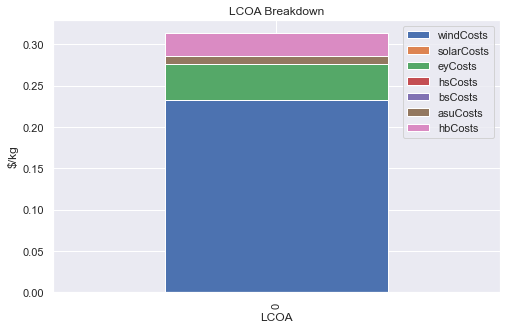

In [126]:
#now looking at LCOA costs breakdown
costDataColNames = ["windCosts","solarCosts","eyCosts","hsCosts","bsCosts","asuCosts","hbCosts"]
dfCosts = singleValueData[costDataColNames]
dfCosts.plot.bar(stacked=True,figsize=(8, 5))
plt.title("LCOA Breakdown")
plt.xlabel("LCOA")
plt.ylabel("$/kg")